# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +66.23510717633                   -2.47    6.96s
  2   +58.88144819990        0.87       -1.37   9.66ms
  3   +43.11998800024        1.20       -0.97   12.5ms
  4   +31.94530902125        1.05       -0.82   12.5ms
  5   +25.84264305375        0.79       -0.69   10.6ms
  6   +12.28116755340        1.13       -0.65   10.6ms
  7   +9.687476548980        0.41       -0.66   35.2ms
  8   +8.117108013180        0.20       -0.68   9.27ms
  9   +7.947147183902       -0.77       -0.71   7.61ms
 10   +7.260075522604       -0.16       -0.72   9.12ms
 11   +6.839871868974       -0.38       -0.66   9.12ms
 12   +6.475438556093       -0.44       -0.75   7.38ms
 13   +6.221761773293       -0.60       -0.82   7.42ms
 14   +6.091008201034       -0.88       -0.86   7.30ms
 15   +5.920965286613       -0.77       -0.83   7.35ms
 16   +5.762165769619       -0.80       -0.77   7.35ms
 17   +5.67

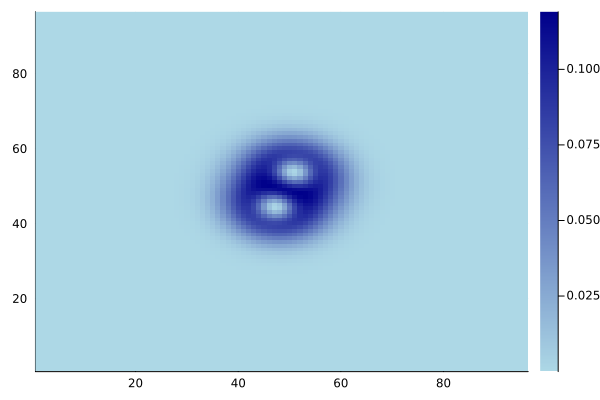

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π) = ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)